In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [83]:
path = 'labs/coursera/ML0101EN/Cust_Segmentation.csv'

In [11]:
df = pd.read

In [ ]:
labs/coursera/ML0101EN/teleCust1000t.csv

In [12]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [13]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [23]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14CC3F50>]],
      dtype=object)

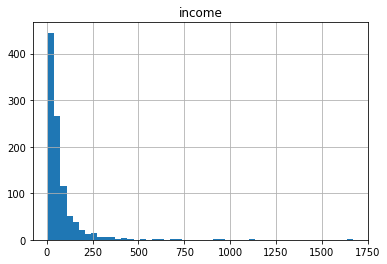

In [27]:
df.hist(column='income', bins=50)

In [44]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values

In [45]:
y = df['custcat'].values

In [46]:
y[:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [47]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [50]:
y_train.shape

(800,)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [54]:
ypred = neigh.predict(X_test)

In [55]:
ypred[:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [56]:
from sklearn import metrics

In [57]:
metrics.accuracy_score(y_train, neigh.predict(X_train))

0.5475

In [58]:
metrics.accuracy_score(y_test, neigh.predict(X_test))

0.32

In [79]:
acc_set = []
i = 1
for i in range(1,10):
    neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_set.append(acc)

In [80]:
acc_set = np.array(acc_set)

In [81]:
acc_set

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

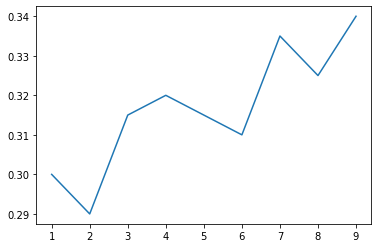

In [82]:
plt.plot(range(1,10), acc_set)